In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import datasets
from sklearn import metrics
import types
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid", palette="bright", font_scale=1.5)

In [3]:
df = pd.read_csv("./world-happiness/2019.csv")
df.head(60)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


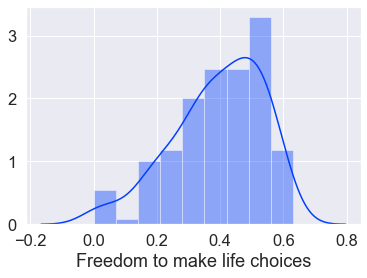

In [7]:
sns.distplot(df['Freedom to make life choices'])

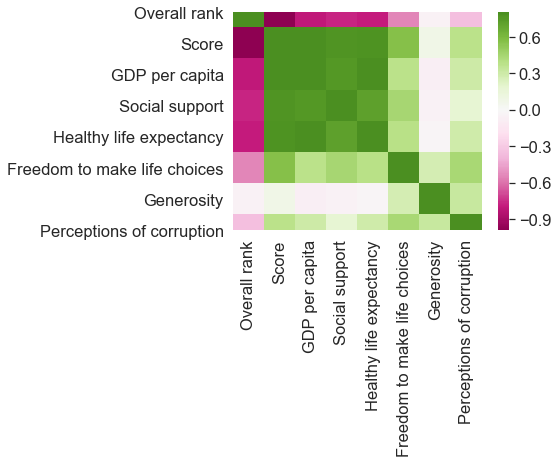

In [8]:
corrmat = df.corr()
sns.color_palette("Paired")
sns.heatmap(corrmat, vmax=.8, square=True, cmap="PiYG", center=0)

In [27]:
data = dict(type = 'choropleth', locations=df['Country or region'], locationmode='country names', z=df['Freedom to make life choices'], 
            text=df['Country or region'],colorbar={'title':'Freedom to make life choices'})
layout = dict(title = 'Global Happiness 2019', geo=dict(showframe = False))
choromap3 = go.Figure(data=[data], layout=layout)
iplot(choromap3)

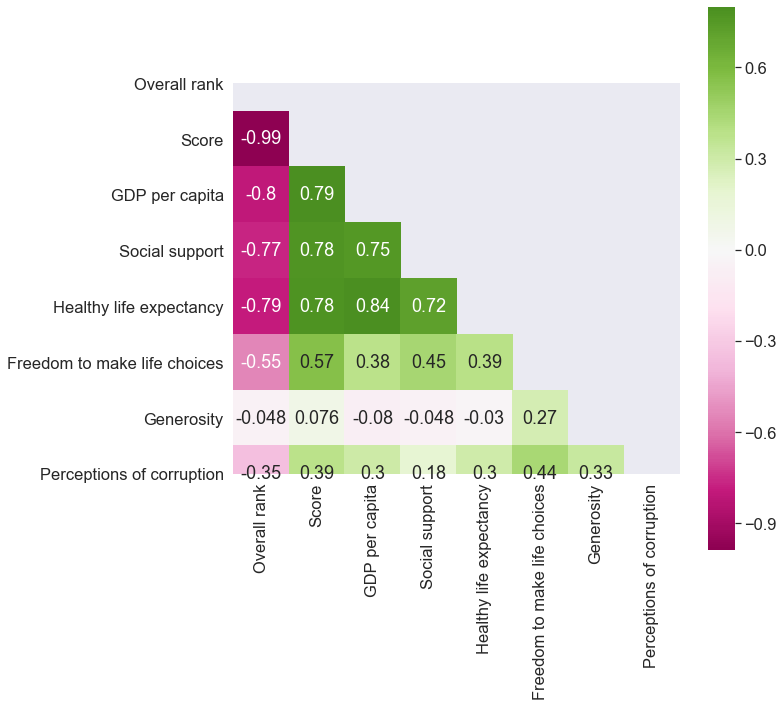

In [16]:
corrmat = df.corr()
mask = np.zeros_like(corrmat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 10))
sns.heatmap(corrmat, annot=True, vmax=.8, square=True, cmap="PiYG", center=0, mask=mask)

In [26]:
from bubbly.bubbly import bubbleplot 

figure = bubbleplot(dataset=df, x_column='GDP per capita', y_column='Healthy life expectancy', 
    bubble_column='Country or region', time_column=None, size_column=None, color_column=None, 
    x_title="GDP per capita", y_title="Healthy life expectancy", title='GDP and Health',
    x_logscale=True, scale_bubble=3, height=650)

iplot(figure, config={'scrollzoom': True})